In [1]:
#from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from lxml import etree
from nltk import word_tokenize
import pickle
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import glob
from tqdm import tqdm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
dfndum_set = set()
new_dfndum_lst = [0]
tot_dfndum_lst = [0]
rep_ratio = []
term_cnt = Counter()
perc_array = np.array([])
for xml_path in tqdm(glob.glob('/mnt/glossary/v2/math*/*.xml.gz')):
    gtree = etree.parse(xml_path).getroot()
    for art in gtree.iter(tag='article'):
        d_lst = [d.text for d in art.findall('.//dfndum')]
        dfndum_set.update(d_lst)
        term_cnt.update(d_lst)
        new_dfndum_lst.append(len(dfndum_set))
        tot_dfndum_lst.append(tot_dfndum_lst[-1] + len(d_lst))
        rep_ratio.append(tot_dfndum_lst[-1]/len(dfndum_set))
        
        N = float(art.attrib['num'])
        percs = np.array(list(float(a.attrib['index']) for a in art.findall('.//definition')))/N
        perc_array = np.append(perc_array, percs)
        #if len(dfndum_set)%100000 == 0:
        #    print(len(dfndum_set))

100%|██████████| 2816/2816 [36:10<00:00,  1.30it/s]


In [7]:
print(f"Total # of term: {tot_dfndum_lst[-1]:,d}")
print(f"# of distinct terms: {new_dfndum_lst[-1]:,d}")
s = 0
term_cnt.most_common()[s:s+50]
#term_cnt['local stability properties']

Total # of term: 5,919,365
# of distinct terms: 1,007,803


[('Lie algebra', 20464),
 ('Suppose', 17869),
 ('Hilbert space', 16860),
 ('function', 14710),
 ('Banach space', 14427),
 ('metric space', 12879),
 ('_inline_math_-module', 12726),
 ('topological space', 12509),
 ('sequence', 12279),
 ('disjoint union', 11415),
 ('vector space', 11331),
 ('simplicial complex', 10923),
 ('graph', 10740),
 ('map', 10610),
 ('morphism', 10575),
 ('open set', 9565),
 ('probability measure', 9189),
 ('set', 9119),
 ('linear map', 8240),
 ('Definition', 8132),
 ('family', 7693),
 ('vector bundle', 7671),
 ('weak solution', 7581),
 ('vertex', 7374),
 ('abelian group', 6896),
 ('operator', 6827),
 ('moduli space', 6637),
 ('group', 6390),
 ('_inline_math_-algebra', 6290),
 ('Lebesgue measure', 6235),
 ('Riemannian manifold', 6184),
 ('pair', 6039),
 ('Lie group', 5963),
 ('subset', 5930),
 ('_inline_math_-vector space', 5836),
 ('Hopf algebra', 5711),
 ('tree', 5674),
 ('vector field', 5562),
 ('line bundle', 5561),
 ('Recall', 5510),
 ('weak equivalence', 543

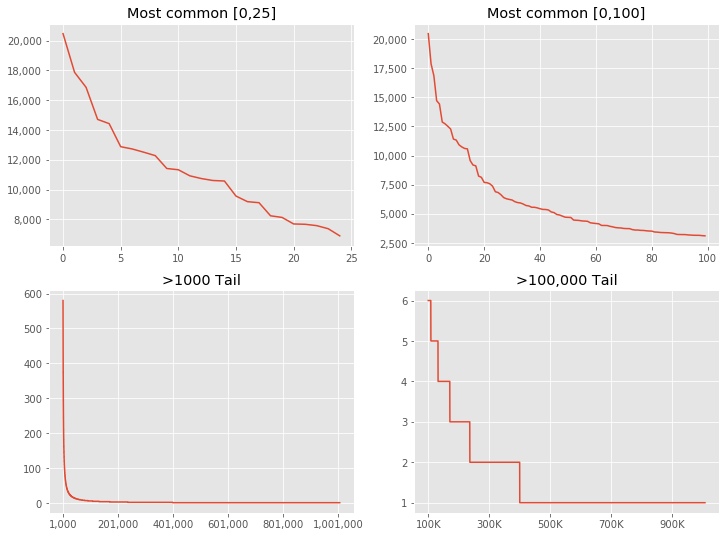

In [87]:
#plt.plot(term_cnt.values())
plt.figure(figsize=[12,9])
ax1 = plt.subplot(221)
plt.plot([t[1] for t in term_cnt.most_common()][0:25])
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{:,d}'.format(int(x))))
plt.title("Most common [0,25]")
ax2 = plt.subplot(222)
plt.title("Most common [0,100]")
plt.plot([t[1] for t in term_cnt.most_common()][0:100])
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{:,d}'.format(int(x))))

ax3 = plt.subplot(223)
plt.plot([t[1] for t in term_cnt.most_common()][1000:])
ax3.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{:,d}'.format(int(x+1000))))
plt.title(">1000 Tail")
ax4 = plt.subplot(224)
tail_val = 100000
plt.plot([t[1] for t in term_cnt.most_common()][tail_val:])
ax4.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{}K'.format(int((tail_val+x)/1000))))
plt.title(f">{tail_val:,d} Tail")
plt.show()

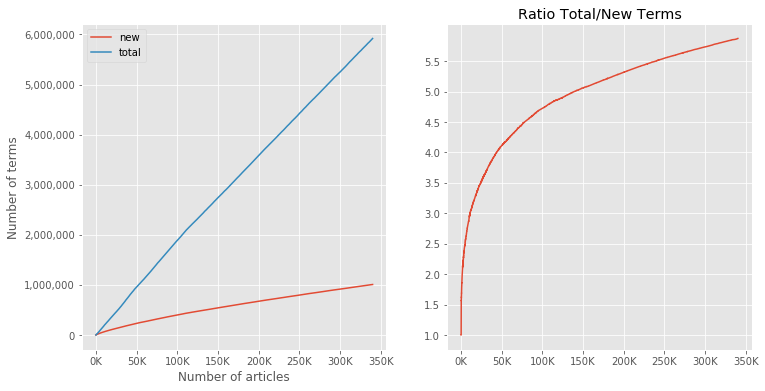

In [92]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
plt.plot(new_dfndum_lst, label='new')
plt.plot(tot_dfndum_lst, label='total')
#plt.title('New terms in math.AG 2015')
plt.ylabel('Number of terms')
plt.xlabel('Number of articles')
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{:,d}'.format(int(x))))
ax1.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{:,d}K'.format(int(x/1000))))

plt.legend()
ax2 = plt.subplot(122)
plt.plot(rep_ratio)
plt.yticks(np.arange(1,6,0.5))
plt.grid(True)
ax2.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{:,d}K'.format(int(x/1000))))
plt.title('Ratio Total/New Terms')
plt.show()

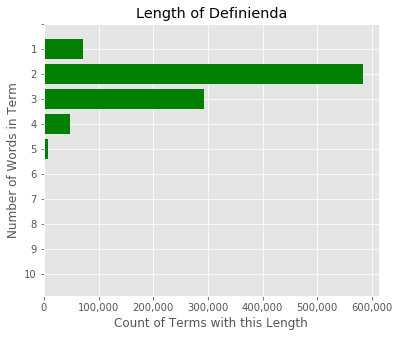

In [65]:
# number of terms in a Defdum
fig=plt.figure(figsize=(6, 5))
n_words = [min(len(w.split()),10) for w in dfndum_set]
len_cnt = Counter(n_words)
plt.style.use('ggplot')
reversed_range = list(range(1,11))
reversed_range.reverse()
ax = plt.subplot(111)
plt.barh([k for k,_ in enumerate(reversed_range)], [len_cnt[l] for l in reversed_range],color='green')
plt.yticks(range(11), reversed_range)
plt.ylabel('Number of Words in Phrase')
plt.xlabel('Count of Terms with this Length')
plt.title('Length of Definienda')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
#[w for w in dfndum_set if len(w.split()) > 10][:5]
print()

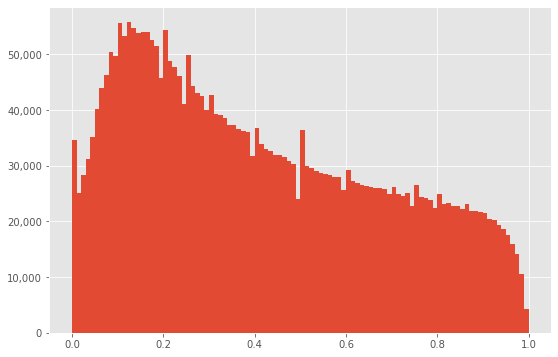

In [68]:
plt.figure(figsize=[9,6])
ax = plt.subplot(111)
plt.hist(perc_array,100)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.title('Relative appearance of definitions')
plt.show()